# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [5]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [3]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 12.03s ==============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [4]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 40  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

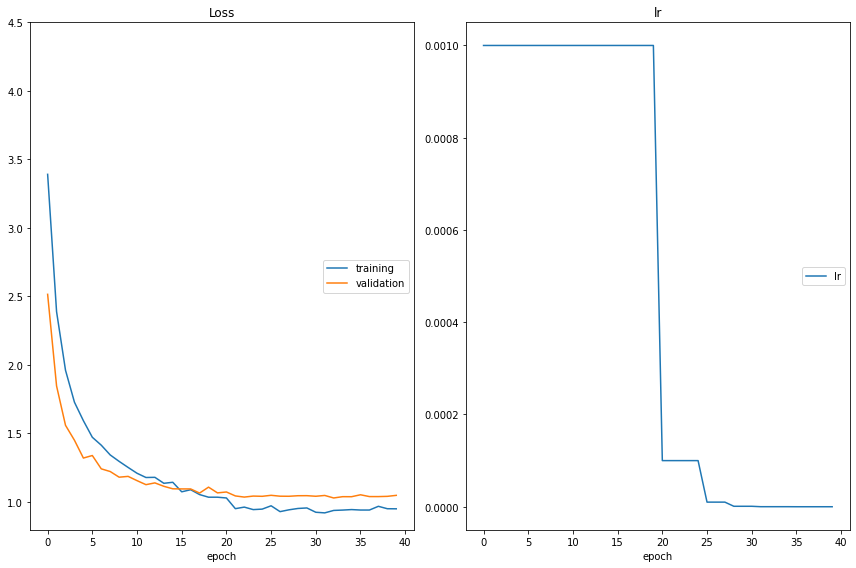

In [5]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning(model_name="resnet18", n_classes=num_classes )

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=True
)

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ 

I used ResNet18 because it is a strong choice that is both efficient and performs well. Its special design helps with training deep networks effectively thanks to its design with residual connections. Additionally, as previously noted, ResNet18's pretrained foundation on the ImageNet dataset makes it an ideal fit for our landmark classification task, given the shared use of natural scene images in both ImageNet and our specific task.

Assistant: 
Sure! Here is a different explanation that does not use the provided sentence:

**Answer:**

The selected model for transfer learning is ResNet18. This model was chosen for its balanced combination of efficiency and performance. The architecture of ResNet18, with its residual connections, is particularly well-suited for training deep networks by addressing issues such as the vanishing gradient problem. Furthermore, these connections enable better gradient flow and faster convergence during training.

### Steps Taken

1. **Model Selection:**
   - First, I checked if the specified model (`resnet18` by default) is included in `torchvision.models`.
   - If the model is available, it is loaded with pre-trained weights by setting `pretrained=True`, which utilizes the pre-existing learned features from the extensive ImageNet dataset.

2. **Freezing Model Parameters:**
   - **Rationale:** To leverage the robust learned features from the pretrained layers and avoid interfering with them during the training process on the new task.
   - **Implementation:** Set `param.requires_grad` to `False` for all parameters, which freezes these layers.

3. **Adding a Custom Linear Layer:**
   - **Rationale:** The original last layer of ResNet18 is designed for the ImageNet classification task with 1000 classes. It needs to be replaced to match our task with 50 classes.
   - **Implementation:**
     - Extracted the number of input features to the final fully connected layer using `model_transfer.fc.in_features`.
     - Replaced the final fully connected layer with a new `nn.Linear` layer that outputs predictions for 50 classes (`nn.Linear(num_ftrs, n_classes)`).

### Suitability of the Architecture

- **Efficiency and Performance:** ResNet18 strikes a good balance between depth (sufficient to learn complex features) and computational efficiency, ensuring it is quick to train and deploy.
- **Robust Training with Residual Connections:** These connections facilitate the training of deeper networks by maintaining the gradient flow and preventing degradation of performance in deeper networks.
- **Top-notch Pretrained Features:** Utilizing weights pretrained on the ImageNet dataset, which contains a wide variety of natural scene images, provides a solid foundation. This is especially helpful for our task involving similar types of images.
- **Flexibility:** By freezing the pre-trained layers and adding a specific final layer tailored to our classification problem, we effectively customize the model for better performance on the new task with minimal effort and training time.




Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [9]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.15it/s]

Test Loss: 0.933054


Test Accuracy: 74% (933/1250)


0.9330542758107185

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [11]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


100%|███████████████████████████████████████| 1250/1250 [23:43<00:00,  1.14s/it]


Accuracy: 0.7448


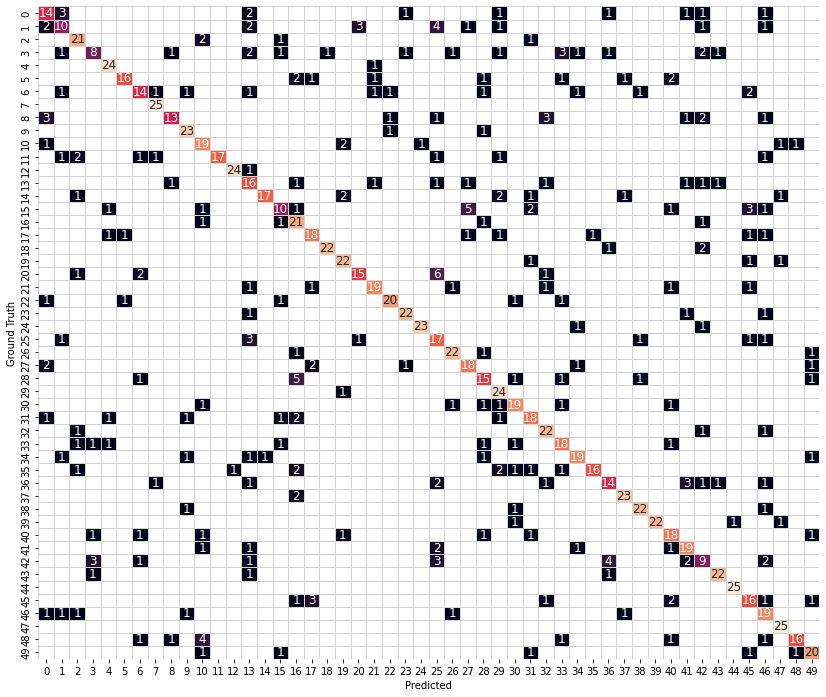

In [13]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix
from src.data import get_data_loaders
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
data_loaders = get_data_loaders(batch_size=batch_size)
model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)